# Assignment 2
\- Yash Gupta (190997)

### Q1. 
Gabor filters are renowned for their functional equivalence to simple orientation-specific cells in primary visual cortex. I want you to design complex cells that can recognize  
(a) triangles and  
(b) squares  
using a bank of orientation-selective 2D Gabor filters. 

Let the base of the triangle and the square be horizontal and the triangle be an isosceles right-angled triangle with the top angle as the right angle. We can design complex cells for them without loss of generality. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [23]:
tri_img = cv2.imread('triangle.jpg', 0)
sq_img = cv2.imread('square.jpg', 0)
blank_img = cv2.imread('blank.jpg', 0)

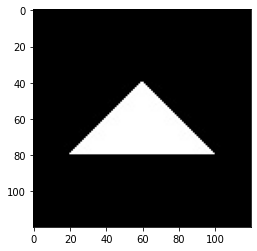

In [8]:
plt.imshow(tri_img)

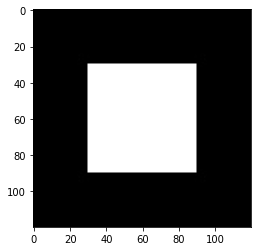

In [9]:
plt.imshow(sq_img)

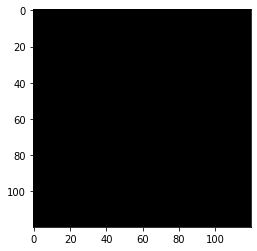

In [21]:
plt.imshow(blank_img)

In [24]:
def find_corners(img):
    corners = []
    contours, _ =  cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(contours)):
        corners.append(np.mean(contours[i].reshape(-1, 2), axis=0))
    return corners

def get_traingle_corners(img, sigma):
    kernel = np.ones((5, 5), dtype=np.uint8)

    gabor_left = cv2.getGaborKernel((31, 31), sigma, np.pi / 4, 2, 0.5, 0, ktype=cv2.CV_32F)
    img_left = cv2.filter2D(img, cv2.CV_8UC3, gabor_left)
    img_left = cv2.dilate(img_left, kernel, iterations=2)
    img_left = cv2.erode(img_left, kernel, iterations=2)
    blur = cv2.GaussianBlur(img_left, (5, 5), 0)
    _, thresh_left = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)

    gabor_right = cv2.getGaborKernel((31, 31), sigma, 3 * np.pi / 4, 2, 0.5, 0, ktype=cv2.CV_32F)
    img_right = cv2.filter2D(img, cv2.CV_8UC3, gabor_right)
    img_right = cv2.dilate(img_right, kernel, iterations=2)
    img_right = cv2.erode(img_right, kernel, iterations=2)
    blur = cv2.GaussianBlur(img_right, (5, 5), 0)
    _, thresh_right = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)

    gabor_base = cv2.getGaborKernel((31, 31), sigma, np.pi / 2, 2, 0.5, 0, ktype=cv2.CV_32F)
    img_base = cv2.filter2D(img, cv2.CV_8UC3, gabor_base)
    img_base = cv2.dilate(img_base, kernel, iterations=2)
    img_base = cv2.erode(img_base, kernel, iterations=2)
    blur = cv2.GaussianBlur(img_base, (5, 5), 0)
    _, thresh_base = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)

    corner_left = np.uint8(thresh_left * thresh_base) * 255
    corner_right = np.uint8(thresh_right * thresh_base) * 255
    corner_top = np.uint8(thresh_left * thresh_right) * 255

    return [corner_left, corner_right, corner_top]

def get_square_corners(img, sigma):
    kernel = np.ones((5, 5), dtype=np.uint8)

    gabor_horizontal = cv2.getGaborKernel((31, 31), sigma, 0, 2, 0.5, 0, ktype=cv2.CV_32F)
    img_horizontal = cv2.filter2D(img, cv2.CV_8UC3, gabor_horizontal)
    img_horizontal = cv2.dilate(img_horizontal, kernel, iterations=2)
    img_horizontal = cv2.erode(img_horizontal, kernel, iterations=2)
    blur = cv2.GaussianBlur(img_horizontal, (5, 5), 0)
    _, thresh_horizontal = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)

    gabor_vertical = cv2.getGaborKernel((31, 31), sigma, np.pi / 2, 2, 0.5, 0, ktype=cv2.CV_32F)
    img_vertical = cv2.filter2D(img, cv2.CV_8UC3, gabor_vertical)
    img_vertical = cv2.dilate(img_vertical, kernel, iterations=2)
    img_vertical = cv2.erode(img_vertical, kernel, iterations=2)
    blur = cv2.GaussianBlur(img_vertical, (5, 5), 0)
    _, thresh_vertical = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)

    corners = np.uint8(thresh_horizontal * thresh_vertical) * 255
    return corners

def check_triangle(img):
    corners = get_traingle_corners(img, 2)
    for i in range(3):
        corner = np.asarray(np.nonzero(corners[i]))
        if corner.shape[1] == 0:
            return False
    return True

def check_square(img):
    corners_img = get_square_corners(img, 2)
    corners = find_corners(corners_img)
    if len(corners) == 4:
        return True
    return False

def classify_image(img):
    img = np.uint8(np.mean(img, axis=2))
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if check_triangle(thresh):
        return 0
    if check_square(thresh):
        return 1
    return 2

In [19]:
classify_image(tri_img)

0

In [18]:
classify_image(sq_img)

1

In [22]:
classify_image(blank_img)

2

### Q2. 
Once you have complex cells identifying triangles and squares, I want you to simulate the visual search paradigm of Triesman (1980), where the task is to find the odd stimulus in a set of objects. In our case, the objects will be red or blue in color and triangles or squares in shape. Simulating the paradigm means   being   able   to   enter   the   number   of   objects   and   experiment   type (feature/conjunction) as parameters and obtain image frames containing objects with these features as output. 

In [ ]:
tri_img = cv2.imread('train')

In [25]:
def feature_search(n):
    img = np.zeros((1440, 1440, 3), np.uint8)
    object_locs = np.random.permutation(np.arange(144))[:n]
    color = np.random.choice(2)
    odd_stimulus_idx = np.random.choice(n)

    for i, loc in enumerate(object_locs):
        if i == odd_stimulus_idx:
            img[(loc // 12) * 120 : (loc // 12 + 1) * 120, (loc % 12) * 120 : (loc % 12 + 1) * 120, 1 - color] = tri_img
        else:
            img[(loc // 12) * 120 : (loc // 12 + 1) * 120, (loc % 12) * 120 : (loc % 12 + 1) * 120, color] = tri_img
    
    return img, object_locs

### Q3. 
Once this paradigm is ready, I want you to implement a simple version of feature integration theory, viz. assume there is a matrix each for color and shape information, and that responses must be delayed until information from   all   relevant   stores   has   been   retrieved.   Can   add   timers   and   delays appropriately to simulate neural processing delays. As output, I want graphs of response time versus number of objects in both feature and conjunction search conditions. 